NEURAL NETWORK ON IMBALANCED DATA

In [145]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D , SeparableConv2D, MaxPool2D, Flatten , Dropout , BatchNormalization
from keras import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras

In [146]:
flight_df = pd.read_csv('/content/drive/MyDrive/Resume Projects/Lexis Nexis Project/history_final.csv')

In [147]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160137 entries, 0 to 160136
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   month                               160137 non-null  float64
 1   day                                 160137 non-null  float64
 2   sched_dep_time                      160137 non-null  float64
 3   sched_arr_time                      160137 non-null  float64
 4   day_of_week                         160137 non-null  float64
 5   duration                            160137 non-null  float64
 6   Carrier_Arrival_Delayed_Percentage  160137 non-null  float64
 7   Carrier_Deaprted_late_perc          160137 non-null  float64
 8   Origin_Percentage_Delayed           160137 non-null  float64
 9   Hour_Arr_delay_Perc                 160137 non-null  float64
 10  Hour_Dep_delay_Perc                 160137 non-null  float64
 11  tail_delay_percent        

In [148]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('LOSS', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.show()

    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('ACCURACY', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.show()

In [149]:
def conf_matrix(conf_mat,):

    conf_mat = pd.DataFrame(conf_mat, index = ['0', '1'], columns = ['0', '1'])
    sns.set(font_scale=1.4)
    plt.figure(figsize = (5,5))
    sns.heatmap(conf_mat, cmap= "Blues", linecolor = 'black' , linewidth = 1, annot = True, fmt='')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.show()

In [150]:
def model_metrics(a, b):

    accuracy = metrics.accuracy_score(a, b)
    precision = precision_score(a, b)
    recall = recall_score(a, b)
    f1 = f1_score(a, b)

    print('Accuracy:', round(accuracy*100, 2),'%')
    print('Precision score:', round(precision*100, 2),'%')
    print('Recall score:', round(recall*100, 2),'%')
    print('F1 score:', round(f1*100, 2),'%')

In [151]:
high_priority_features = [
    "tail_delay_percent",
    "flight_encoded",
    "tailnum_encoded",
    "tail_arr_delay",
    "Carr_Dest_Arrival_delay",
    "Carr_Day_Arrival_delay"
]


In [152]:
X = flight_df[high_priority_features]
y = flight_df['lateflight']

In [153]:
flight_df.isna().sum().sum()

0

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model 1

In [155]:
model_1 = Sequential()

model_1.add(Dense(100, activation='tanh', input_shape=(6,)))

model_1.add(Dense(1, activation='sigmoid'))

In [156]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [157]:
results1 = model_1.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
3604/3604 [==============================] - 8s 2ms/step - loss: 0.5800 - accuracy: 0.7103 - val_loss: 0.5728 - val_accuracy: 0.7127
Epoch 2/5
3604/3604 [==============================] - 7s 2ms/step - loss: 0.5748 - accuracy: 0.7113 - val_loss: 0.5724 - val_accuracy: 0.7135
Epoch 3/5
3604/3604 [==============================] - 7s 2ms/step - loss: 0.5743 - accuracy: 0.7117 - val_loss: 0.5726 - val_accuracy: 0.7123
Epoch 4/5
3604/3604 [==============================] - 8s 2ms/step - loss: 0.5744 - accuracy: 0.7114 - val_loss: 0.5724 - val_accuracy: 0.7129
Epoch 5/5
3604/3604 [==============================] - 7s 2ms/step - loss: 0.5743 - accuracy: 0.7113 - val_loss: 0.5786 - val_accuracy: 0.7074


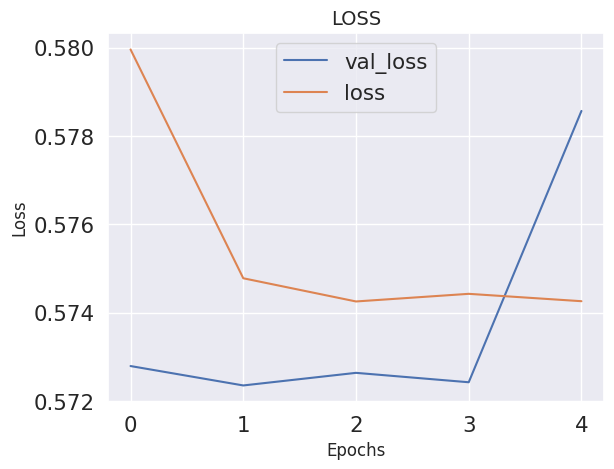

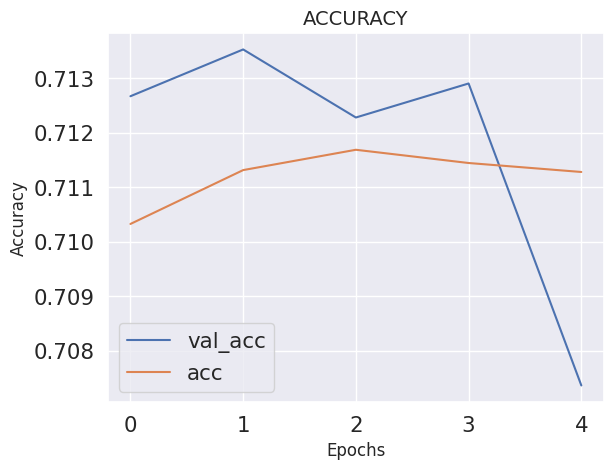

In [158]:
visualize_training_results(results1)

In [162]:
y_pred_m1 = model_1.predict(X_test)
y_pred_m1 =(y_pred_m1 > 0.5)

1001/1001 [==============================] - 2s 2ms/step


In [163]:
cm_m1 = confusion_matrix(y_test, y_pred_m1)
print(cm_m1)
print("------------------")
print(classification_report(y_test, y_pred_m1))

[[20729  1925]
 [ 7448  1926]]
------------------
              precision    recall  f1-score   support

           0       0.74      0.92      0.82     22654
           1       0.50      0.21      0.29      9374

    accuracy                           0.71     32028
   macro avg       0.62      0.56      0.55     32028
weighted avg       0.67      0.71      0.66     32028



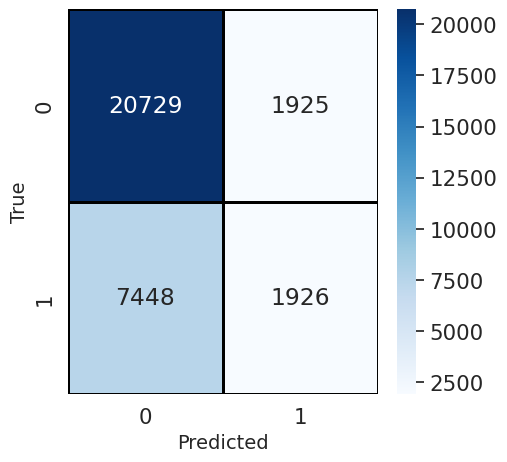

In [164]:
conf_matrix(cm_m1)

In [165]:
model_metrics(y_test, y_pred_m1)

Accuracy: 70.73 %
Precision score: 50.01 %
Recall score: 20.55 %
F1 score: 29.13 %


# model2

In [166]:
model_2 = Sequential()

model_2.add(Dense(100, activation='tanh', input_shape=(6,)))

model_2.add(Dense(100, activation='tanh'))

model_2.add(Dense(1, activation='sigmoid'))

In [167]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [168]:
results2 = model_2.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
3604/3604 [==============================] - 10s 3ms/step - loss: 0.5783 - accuracy: 0.7109 - val_loss: 0.5724 - val_accuracy: 0.7131
Epoch 2/5
3604/3604 [==============================] - 7s 2ms/step - loss: 0.5753 - accuracy: 0.7115 - val_loss: 0.5732 - val_accuracy: 0.7120
Epoch 3/5
3604/3604 [==============================] - 9s 3ms/step - loss: 0.5753 - accuracy: 0.7116 - val_loss: 0.5720 - val_accuracy: 0.7136
Epoch 4/5
3604/3604 [==============================] - 7s 2ms/step - loss: 0.5750 - accuracy: 0.7107 - val_loss: 0.5732 - val_accuracy: 0.7124
Epoch 5/5
3604/3604 [==============================] - 9s 3ms/step - loss: 0.5750 - accuracy: 0.7116 - val_loss: 0.5721 - val_accuracy: 0.7125


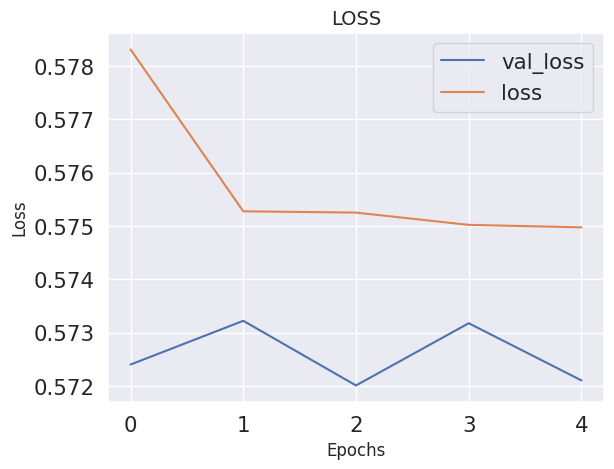

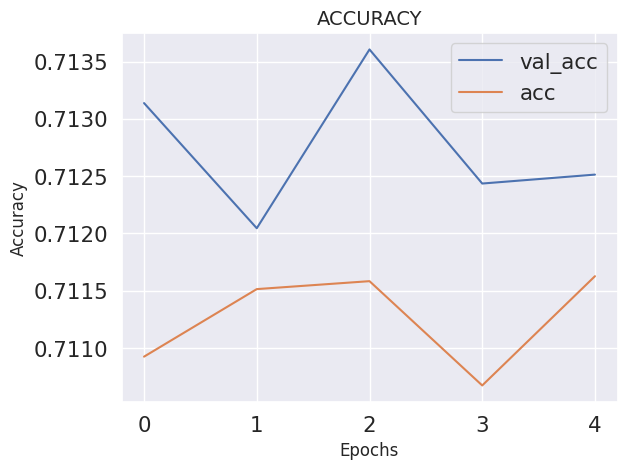

In [169]:
visualize_training_results(results2)

In [170]:
y_pred_m2 = model_2.predict(X_test)
y_pred_m2 =(y_pred_m1 > 0.5)

1001/1001 [==============================] - 2s 2ms/step


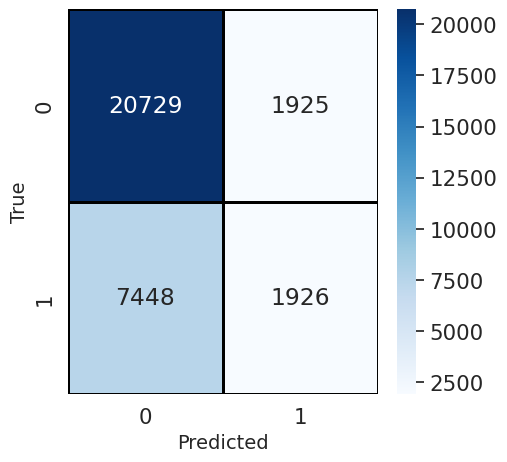

In [171]:
conf_matrix(cm_m2)

In [172]:
model_metrics(y_test, y_pred_m2)

Accuracy: 70.73 %
Precision score: 50.01 %
Recall score: 20.55 %
F1 score: 29.13 %


## Model 3





In [173]:
model_3 = Sequential()

model_3.add(Dense(50, activation='relu', input_shape=(6,)))

model_3.add(Dense(100, activation='relu'))

model_3.add(Dense(150, activation='relu'))

model_3.add(Dense(1, activation='sigmoid'))

In [174]:
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [175]:
results3 = model_3.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
3604/3604 [==============================] - 11s 3ms/step - loss: 0.5777 - accuracy: 0.7105 - val_loss: 0.5702 - val_accuracy: 0.7120
Epoch 2/5
3604/3604 [==============================] - 8s 2ms/step - loss: 0.5740 - accuracy: 0.7105 - val_loss: 0.5700 - val_accuracy: 0.7125
Epoch 3/5
3604/3604 [==============================] - 10s 3ms/step - loss: 0.5733 - accuracy: 0.7114 - val_loss: 0.5728 - val_accuracy: 0.7098
Epoch 4/5
3604/3604 [==============================] - 8s 2ms/step - loss: 0.5734 - accuracy: 0.7105 - val_loss: 0.5721 - val_accuracy: 0.7116
Epoch 5/5
3604/3604 [==============================] - 10s 3ms/step - loss: 0.5731 - accuracy: 0.7117 - val_loss: 0.5718 - val_accuracy: 0.7129


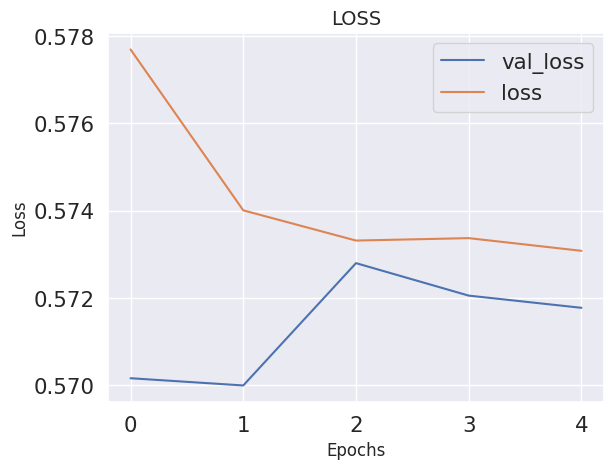

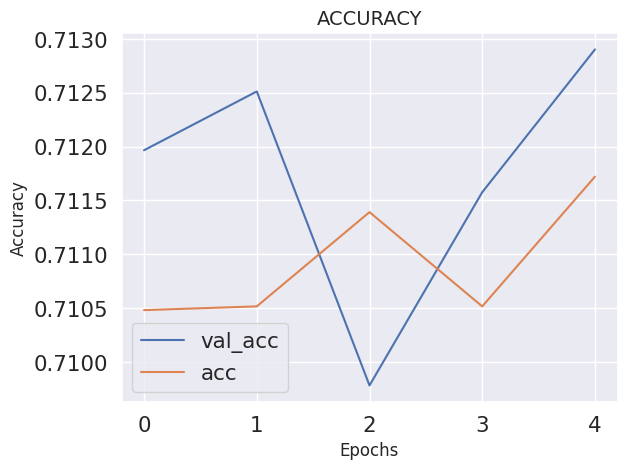

In [176]:
visualize_training_results(results3)

In [177]:
y_pred_m3 = model_3.predict(X_test)
y_pred_m3 =(y_pred_m3 > 0.5)

1001/1001 [==============================] - 2s 1ms/step


In [178]:
cm_m3 = confusion_matrix(y_test, y_pred_m3)
print(cm_m3)
print("------------------")
print(classification_report(y_test, y_pred_m3))

[[22179   475]
 [ 8709   665]]
------------------
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     22654
           1       0.58      0.07      0.13      9374

    accuracy                           0.71     32028
   macro avg       0.65      0.52      0.48     32028
weighted avg       0.68      0.71      0.62     32028



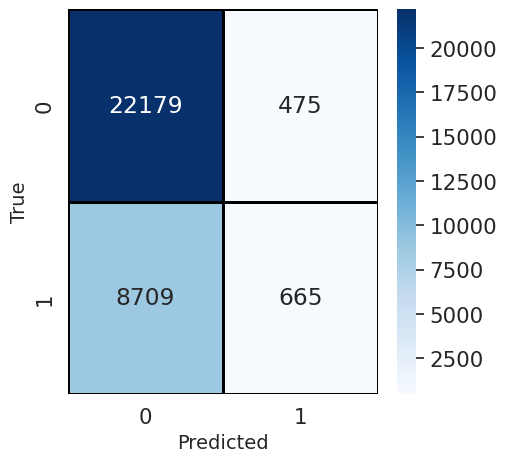

In [179]:
conf_matrix(cm_m3)

In [180]:
model_metrics(y_test, y_pred_m3)

Accuracy: 71.33 %
Precision score: 58.33 %
Recall score: 7.09 %
F1 score: 12.65 %


## Model 4

In [181]:
model_4 = Sequential()

model_4.add(Dense(30, activation='relu', input_shape=(6,)))

model_4.add(Dense(50, activation='relu'))

model_4.add(Dense(50, activation='relu'))

model_4.add(Dense(1, activation='sigmoid'))

In [182]:
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [183]:
results4 = model_4.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
3604/3604 [==============================] - 19s 5ms/step - loss: 0.5790 - accuracy: 0.7096 - val_loss: 0.5851 - val_accuracy: 0.7092
Epoch 2/10
3604/3604 [==============================] - 14s 4ms/step - loss: 0.5741 - accuracy: 0.7116 - val_loss: 0.5709 - val_accuracy: 0.7127
Epoch 3/10
3604/3604 [==============================] - 8s 2ms/step - loss: 0.5734 - accuracy: 0.7118 - val_loss: 0.5712 - val_accuracy: 0.7127
Epoch 4/10
3604/3604 [==============================] - 9s 3ms/step - loss: 0.5732 - accuracy: 0.7110 - val_loss: 0.5700 - val_accuracy: 0.7135
Epoch 5/10
3604/3604 [==============================] - 8s 2ms/step - loss: 0.5730 - accuracy: 0.7117 - val_loss: 0.5715 - val_accuracy: 0.7099
Epoch 6/10
3604/3604 [==============================] - 9s 2ms/step - loss: 0.5730 - accuracy: 0.7110 - val_loss: 0.5704 - val_accuracy: 0.7130
Epoch 7/10
3604/3604 [==============================] - 8s 2ms/step - loss: 0.5728 - accuracy: 0.7116 - val_loss: 0.5703 - val_accurac

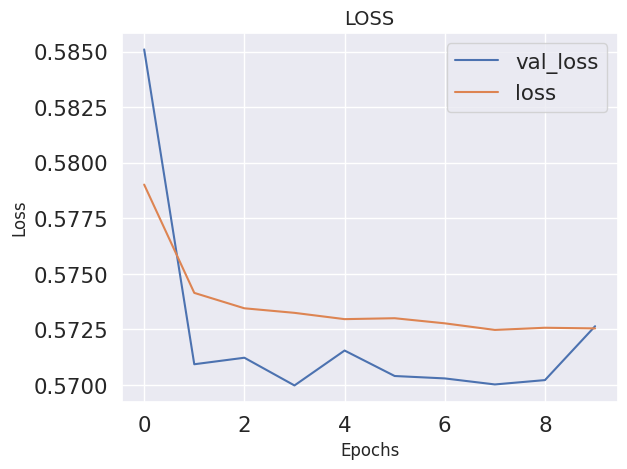

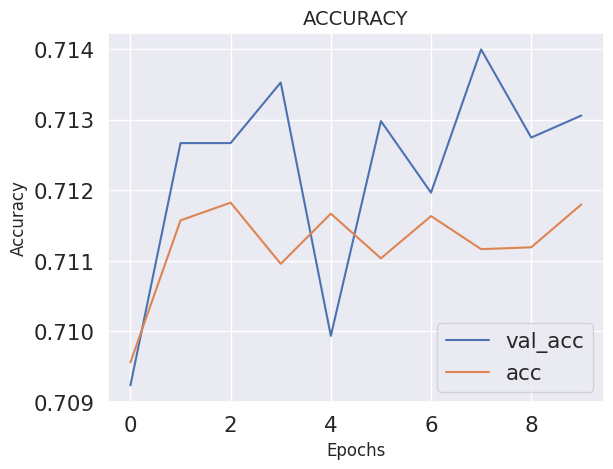

In [184]:
visualize_training_results(results4)

In [185]:
y_pred_m4 = model_4.predict(X_test)
y_pred_m4 =(y_pred_m4 > 0.5)

1001/1001 [==============================] - 4s 4ms/step


In [186]:
cm_m4 = confusion_matrix(y_test, y_pred_m4)
print(cm_m4)
print("------------------")
print(classification_report(y_test, y_pred_m4))

[[22010   644]
 [ 8530   844]]
------------------
              precision    recall  f1-score   support

           0       0.72      0.97      0.83     22654
           1       0.57      0.09      0.16      9374

    accuracy                           0.71     32028
   macro avg       0.64      0.53      0.49     32028
weighted avg       0.68      0.71      0.63     32028



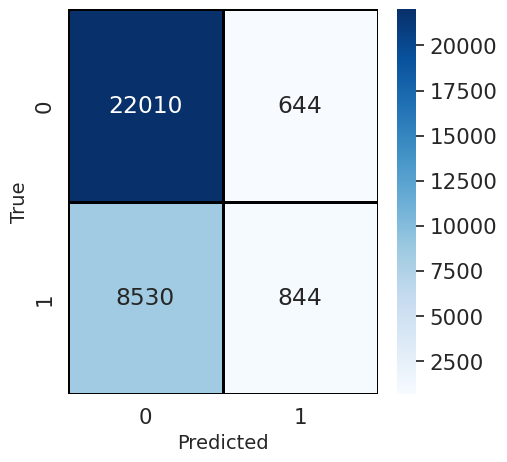

In [187]:
conf_matrix(cm_m4)

In [188]:
model_metrics(y_test, y_pred_m4)

Accuracy: 71.36 %
Precision score: 56.72 %
Recall score: 9.0 %
F1 score: 15.54 %


## Model 5

In [189]:
model_5 = Sequential()

model_5.add(Dense(30, activation='relu', input_shape=(6,)))

model_5.add(Dense(20, activation='relu'))

model_5.add(Dense(5, activation='relu'))

model_5.add(Dense(1, activation='sigmoid'))

In [190]:
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [191]:
results5 = model_5.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Epoch 1/2
3604/3604 [==============================] - 10s 2ms/step - loss: 0.5797 - accuracy: 0.7104 - val_loss: 0.5718 - val_accuracy: 0.7122
Epoch 2/2
3604/3604 [==============================] - 8s 2ms/step - loss: 0.5745 - accuracy: 0.7110 - val_loss: 0.5717 - val_accuracy: 0.7117


In [192]:
y_pred_m5 = model_5.predict(X_test)
y_pred_m5 =(y_pred_m1 > 0.5)

1001/1001 [==============================] - 2s 2ms/step


In [193]:
cm_m5 = confusion_matrix(y_test, y_pred_m5)
print(cm_m5)
print("------------------")
print(classification_report(y_test, y_pred_m5))

[[20729  1925]
 [ 7448  1926]]
------------------
              precision    recall  f1-score   support

           0       0.74      0.92      0.82     22654
           1       0.50      0.21      0.29      9374

    accuracy                           0.71     32028
   macro avg       0.62      0.56      0.55     32028
weighted avg       0.67      0.71      0.66     32028



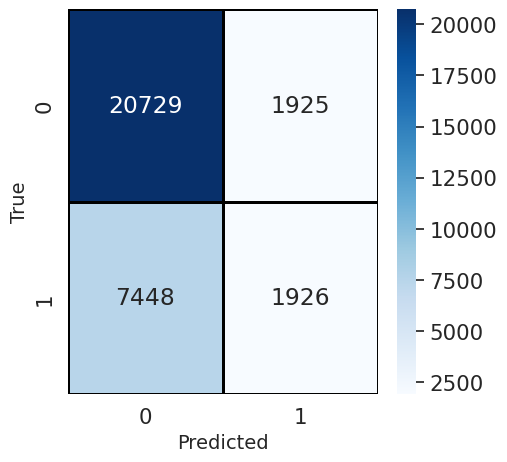

In [194]:
conf_matrix(cm_m5)

In [195]:
model_metrics(y_test, y_pred_m5)

Accuracy: 70.73 %
Precision score: 50.01 %
Recall score: 20.55 %
F1 score: 29.13 %


## Model 6

In [196]:
model_6 = Sequential()

model_6.add(Dense(50, activation='relu', input_shape=(6,)))

model_6.add(Dense(40, activation='relu'))

model_6.add(Dense(30, activation='relu'))

model_6.add(Dense(5, activation='relu'))

model_6.add(Dense(1, activation='sigmoid'))

In [197]:
model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [198]:
results6 = model_6.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Epoch 1/2
3604/3604 [==============================] - 10s 2ms/step - loss: 0.5787 - accuracy: 0.7074 - val_loss: 0.5720 - val_accuracy: 0.7115
Epoch 2/2
3604/3604 [==============================] - 9s 2ms/step - loss: 0.5747 - accuracy: 0.7108 - val_loss: 0.5714 - val_accuracy: 0.7116


In [199]:
y_pred_m6 = model_6.predict(X_test)
y_pred_m6 =(y_pred_m6 > 0.5)

1001/1001 [==============================] - 1s 1ms/step


In [200]:
cm_m6 = confusion_matrix(y_test, y_pred_m6)
print(cm_m6)
print("------------------")
print(classification_report(y_test, y_pred_m6))

[[22143   511]
 [ 8665   709]]
------------------
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     22654
           1       0.58      0.08      0.13      9374

    accuracy                           0.71     32028
   macro avg       0.65      0.53      0.48     32028
weighted avg       0.68      0.71      0.63     32028



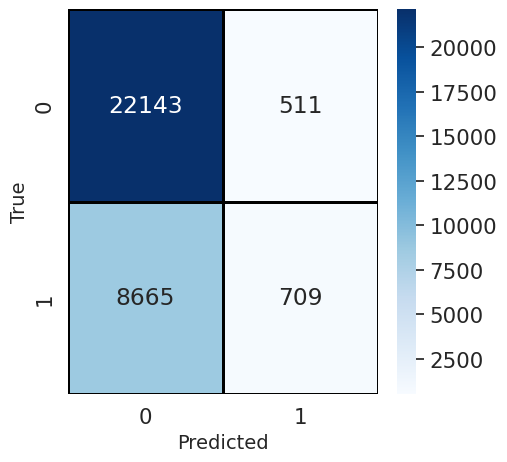

In [201]:
conf_matrix(cm_m6)

In [202]:
model_metrics(y_test, y_pred_m6)

Accuracy: 71.35 %
Precision score: 58.11 %
Recall score: 7.56 %
F1 score: 13.38 %


## Model 7

In [203]:
model_7 = Sequential()

model_7.add(Dense(30, activation='relu', input_shape=(6,)))

model_7.add(Dense(10, activation='relu'))

model_7.add(Dense(5, activation='relu'))

model_7.add(Dense(1, activation='sigmoid'))

In [204]:
model_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [205]:
results7 = model_7.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
3604/3604 [==============================] - 10s 3ms/step - loss: 0.5807 - accuracy: 0.7093 - val_loss: 0.5756 - val_accuracy: 0.7106
Epoch 2/25
3604/3604 [==============================] - 7s 2ms/step - loss: 0.5739 - accuracy: 0.7116 - val_loss: 0.5739 - val_accuracy: 0.7112
Epoch 3/25
3604/3604 [==============================] - 9s 3ms/step - loss: 0.5735 - accuracy: 0.7118 - val_loss: 0.5713 - val_accuracy: 0.7120
Epoch 4/25
3604/3604 [==============================] - 7s 2ms/step - loss: 0.5732 - accuracy: 0.7115 - val_loss: 0.5702 - val_accuracy: 0.7128
Epoch 5/25
3604/3604 [==============================] - 9s 3ms/step - loss: 0.5730 - accuracy: 0.7120 - val_loss: 0.5742 - val_accuracy: 0.7126
Epoch 6/25
3604/3604 [==============================] - 7s 2ms/step - loss: 0.5727 - accuracy: 0.7122 - val_loss: 0.5731 - val_accuracy: 0.7126
Epoch 7/25
3604/3604 [==============================] - 9s 3ms/step - loss: 0.5724 - accuracy: 0.7121 - val_loss: 0.5714 - val_accuracy

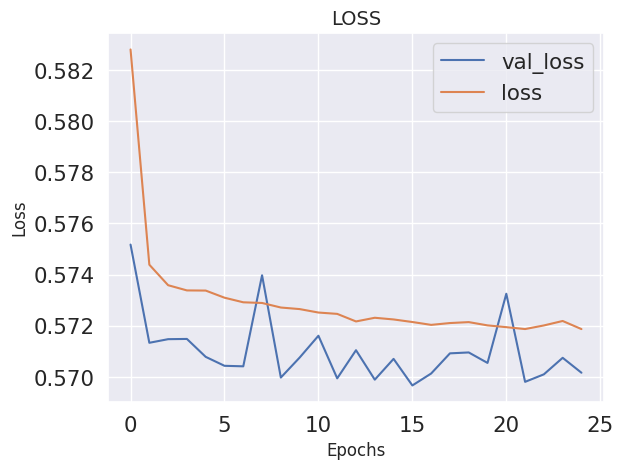

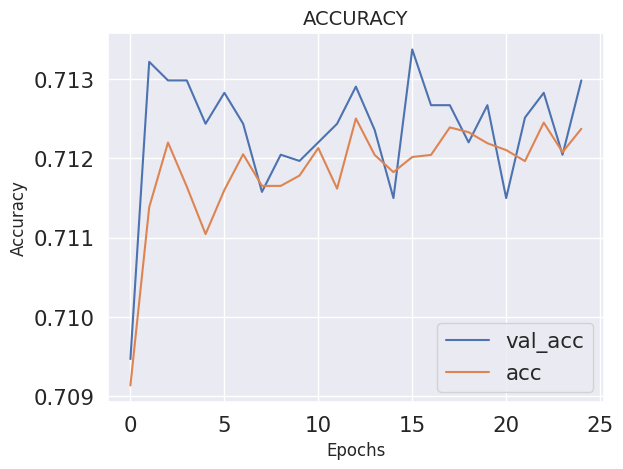

In [115]:
visualize_training_results(results7)

In [206]:
y_pred_m7 = model_7.predict(X_test)
y_pred_m7 =(y_pred_m7 > 0.5)

1001/1001 [==============================] - 1s 1ms/step


In [207]:
cm_m7 = confusion_matrix(y_test, y_pred_m7)
print(cm_m7)
print("------------------")
print(classification_report(y_test, y_pred_m7))

[[21760   894]
 [ 8292  1082]]
------------------
              precision    recall  f1-score   support

           0       0.72      0.96      0.83     22654
           1       0.55      0.12      0.19      9374

    accuracy                           0.71     32028
   macro avg       0.64      0.54      0.51     32028
weighted avg       0.67      0.71      0.64     32028



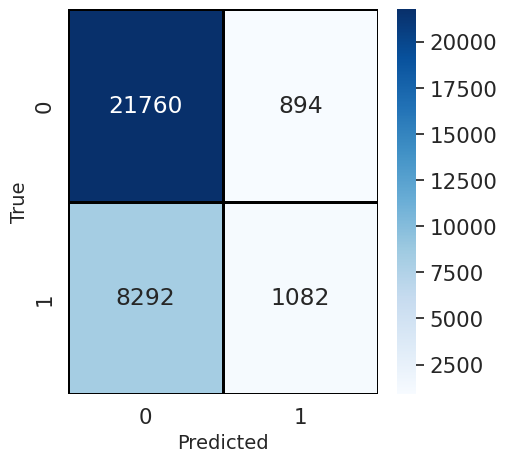

In [208]:
conf_matrix(cm_m7)

In [209]:
model_metrics(y_test, y_pred_m7)

Accuracy: 71.32 %
Precision score: 54.76 %
Recall score: 11.54 %
F1 score: 19.07 %
